In [0]:

import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from imageio import imread
from skimage.transform import resize
from scipy.spatial import distance
from keras.models import load_model

%matplotlib inline


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
model = load_model('/content/drive/My Drive/DCGAN/facial_recognition/facenet_keras.h5')
model.load_weights('/content/drive/My Drive/DCGAN/facial_recognition/facenet_keras_weights.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
cascade_path = '/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml'

image_size = 160


In [0]:
def prewhiten(x):
    if x.ndim == 4:
        axis = (1, 2, 3)
        size = x[0].size
    elif x.ndim == 3:
        axis = (0, 1, 2)
        size = x.size
    else:
        print(x.ndim)
        raise ValueError('Dimension should be 3 or 4')

    mean = np.mean(x, axis=axis, keepdims=True)
    std = np.std(x, axis=axis, keepdims=True)
    std_adj = np.maximum(std, 1.0/np.sqrt(size))
    y = (x - mean) / std_adj
    return y

def l2_normalize(x, axis=-1, epsilon=1e-10):
    output = x / np.sqrt(np.maximum(np.sum(np.square(x), axis=axis, keepdims=True), epsilon))
    return output

In [0]:
def load_and_align_images(filepaths, margin):
    cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
    cascade.load(cascade_path)

    print(cascade_path)
    aligned_images = []
    for filepath in filepaths:
        img = imread(filepath)
        faces = cascade.detectMultiScale(img,
                                         scaleFactor=1.1,
                                         minNeighbors=3)
        # if (faces == ()):
        #   continue
        # print(filepath,"ssss" ,faces)
        (x, y, w, h) = faces[0]
        cropped = img[y-margin//2:y+h+margin//2,
                      x-margin//2:x+w+margin//2, :]
        aligned = resize(cropped, (image_size, image_size), mode='reflect')
        aligned_images.append(aligned)
            
    return np.array(aligned_images)

In [0]:

def calc_embs(filepaths, margin=0, batch_size=1):
    aligned_images = prewhiten(load_and_align_images(filepaths, margin))
    pd = []
    for start in range(0, len(aligned_images), batch_size):
        pd.append(model.predict_on_batch(aligned_images[start:start+batch_size]))
    embs = l2_normalize(np.concatenate(pd))

    return embs

In [0]:

def calc_dist(img_name0, img_name1):
    return distance.euclidean(data[img_name0]['emb'], data[img_name1]['emb'])

def calc_dist_plot(img_name0, img_name1):
    print(calc_dist(img_name0, img_name1))
    plt.subplot(1, 2, 1)
    plt.imshow(imread(data[img_name0]['image_filepath']))
    plt.subplot(1, 2, 2)
    plt.imshow(imread(data[img_name1]['image_filepath']))

# compute min in batch function

In [0]:
def compute_min_batch(dir_base,key_in,data):
  min_distance = 1000
  min_key =''
  L = len(os.listdir(dir_base))
  # L = len(os.listdir('/content/drive/My Drive/DCGAN/database'))
  for i in range(L):
      key = key_in + str(i)
      distancee = calc_dist('test0', key)
      # print(key,':',distancee)
      if(distancee < min_distance):
          min_distance = distancee
          min_key = key
  calc_dist_plot('test0', min_key)
  local_min = (min_distance,data[min_key]['image_filepath'])
  return local_min

# Compute

/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
0.9165248870849609
database/0
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
0.9200600981712341
database/1
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
0.9031764268875122
database/5
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
0.8494284749031067
database/6
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
0.8804486989974976
database/7
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
0.9042991399765015
database/8
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
0.8824089169502258
database/9
/content/drive/My Drive/DCGAN/facial_recognition/haarcascade_frontalface_alt2.xml
/content/drive/My Drive/DCGAN/

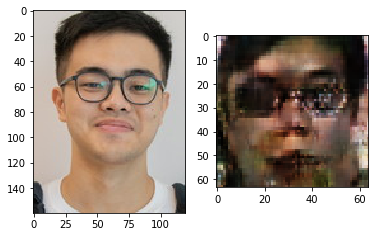

In [34]:
database_path = '/content/drive/My Drive/DCGAN/database/'
database_batches = os.listdir(database_path)
min_batch = (1000,"")

for database_batch in database_batches:
  data = {}
  names  = ['database/'+database_batch,'test']
  image_dir_basepath = '/content/drive/My Drive/DCGAN/'
  for name in names:
    # get image urls in batch
    image_dirpath = image_dir_basepath + name
    image_filepaths = list()
    for f in os.listdir(image_dirpath):
        if f != '.DS_Store':
             image_filepaths.append(os.path.join(image_dirpath, f))
    # compute data
    embs = calc_embs(image_filepaths)
    for i in range(len(image_filepaths)):
        data['{}{}'.format(name, i)] = {'image_filepath' : image_filepaths[i],'emb' : embs[i]}
  # print(list(data.keys()) ) 
  
  # set min value
  local_min = compute_min_batch( database_path+database_batch, 
                                    'database/'+database_batch,
                                    data)
  if(local_min[0] < min_batch[0]):
    min_batch = local_min
  print('database/'+database_batch)

#  Compute the closest

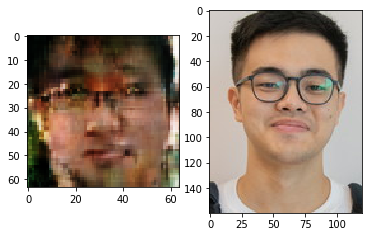

In [39]:
plt.subplot(1, 2, 1)
plt.imshow(imread(min_batch[1]))
plt.subplot(1, 2, 2)
plt.imshow(imread(data['test0']['image_filepath']))

In [40]:
# !pip install opencv-contrib-python


TypeError: ignored